In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
en_dict = set(nltk.corpus.words.words())
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', font='monospace')

In [2]:
df = pd.read_csv('data_wo_outliers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1031 non-null   int64  
 1   name            1031 non-null   object 
 2   wins            1031 non-null   int64  
 3   kills           1031 non-null   int64  
 4   kdRatio         1031 non-null   float64
 5   killstreak      1031 non-null   int64  
 6   level           1031 non-null   int64  
 7   losses          1031 non-null   int64  
 8   prestige        1031 non-null   int64  
 9   hits            1031 non-null   int64  
 10  timePlayed      1031 non-null   int64  
 11  headshots       1031 non-null   int64  
 12  averageTime     1031 non-null   float64
 13  gamesPlayed     1031 non-null   int64  
 14  assists         1031 non-null   int64  
 15  misses          1031 non-null   int64  
 16  xp              1031 non-null   int64  
 17  scorePerMinute  1031 non-null   f

In [5]:
from sklearn.cluster import KMeans

In [6]:
clusters = KMeans(n_clusters=4).fit(df[['winRateAlt', 'kdRatioAlt']])
df['skillTier'] = clusters.labels_
centers = [(x, y) for x, y in clusters.cluster_centers_]
centers_sorted = sorted(centers)
df['skillTier'] = df['skillTier'].apply(lambda idx: centers_sorted.index(centers[idx]) + 1)

In [7]:
for name in df['name']:
    print(name)

RggRt45#4697369
JohniceRex#9176033
JNaCo#5244172
gomezyayo_007#6596687
ahevepluto#3505304
RPDUNKduo#8122914
BOBOQQ3#7928912
Damian291207#7986887
SanDrasoSa
DrunkUnc92#7705654
whoshotghost#1916366
LimpThaDon
TawheedAhmed42
teruteru_yt_#6461227
edgexgaming8901#9276950
ferni775#9063204
CohesiveMango93#8505922
Bobdustt#2422031
caliopez99#8569536
EH4B_367#1401846
sammy7227#7543148
WilcyWilson#2599001
URjustBADXD#7190593
DaydayLadd96#1594916
S3ND3RBUB12#9216137
Die#1566463
McWiggins14#5533106
Manuel Alarcon1#6037069
LEAN GAL#3205759
Ludsghy#4258818
swayfaze097#4838954
Sir_Luffwaffles1#7708807
Grrrr pow#5106418
DeadShot1687#6299823
leandr1nho13#4383266
Blom-Tiee#6925955
Unfinishe#7062263
Sup Solaay#9600056
Gaqwe33399#4850936
T3agan07#6903176
Thnikkamaan
Mystica#3905510
user32849001#6793597
Hunter_S_Bombin#4973033
blackiechan00
Luluchiaa#8768510
fireland56#3811414
Teo#8038666
Mhamed9772#8788714
kamazsoft#1273914
TheRealKulumbele#2435541
Ksk gustav#1566519
Papi flashy#5364268
Conberve440#862229

> Notice the hashtag followed by a string of numbers at the end of most names. These are *Activision IDs* that
> we shall remove from the data. There are also names with foreign characters (Korean, Japanese, Chinese etc). We
> will create a new column to denote the presence of these characters.

In [8]:
df['name']          = df['name'].apply(lambda s: re.sub(r'#\d+$', '', s).lower())
df['isEnglishName'] = df['name'].apply(lambda s: 'Yes' if s.isascii() else 'No')

In [9]:
df['nameLength'] = df['name'].apply(lambda s: len(s))

<Axes: xlabel='nameLength', ylabel='Count'>

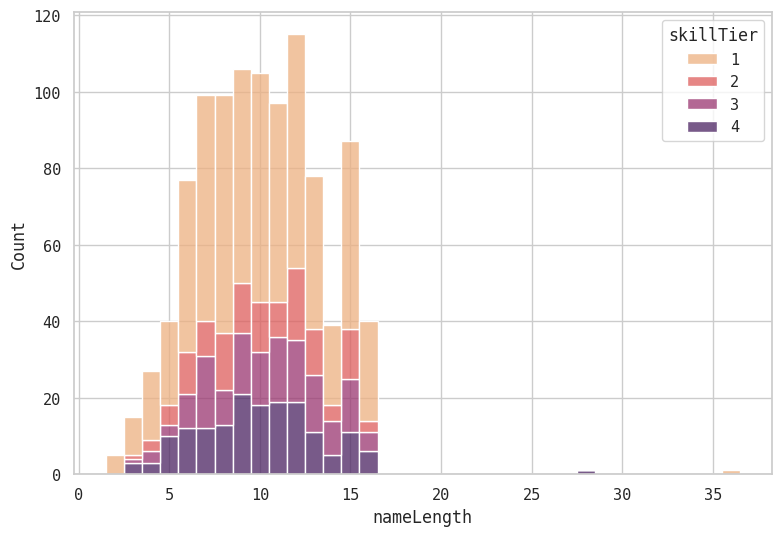

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(9, 6))
sns.histplot(data=df,
             x='nameLength',
             discrete=True,
             hue='skillTier',
             palette='flare',
             multiple='stack')

> The length of a player's name does not seem to have a bearing on his `skillTier`.

<Axes: xlabel='skillTier', ylabel='Count'>

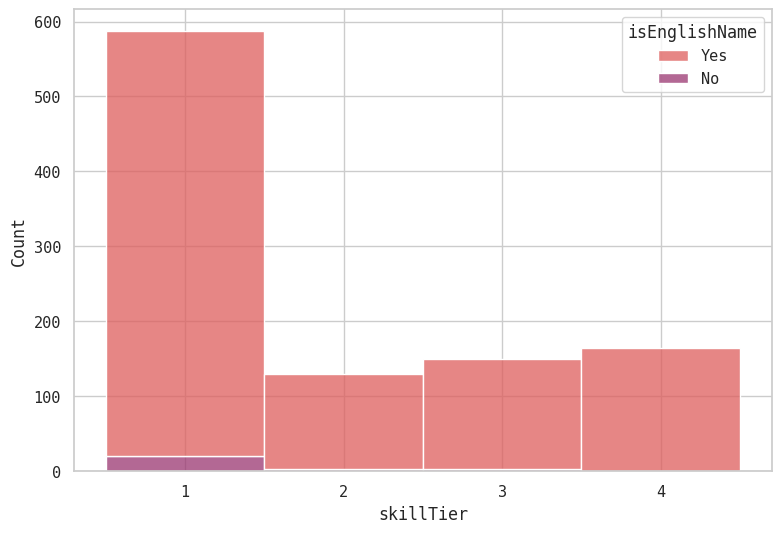

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(9, 6))
axes.set_xticks(range(1, 5))
sns.histplot(data=df,
             x='skillTier',
             discrete=True,
             hue='isEnglishName',
             palette='flare',
             multiple='stack')

> Although many often perceive foreign players as being better, i.e, those with Chinese, Japanese or Korean characters
> in their names, that doesn't seem to be the case either as there are still many foreign players in the lowest skill
> bracket.

In [12]:
def get_en_words(s):
    return [''.join(ng) for ng in nltk.everygrams(s) if ''.join(ng).lower() in en_dict and len(''.join(ng)) >= 3]

In [13]:
sia = SentimentIntensityAnalyzer()

In [14]:
polarities = []
for i in range(len(df)):
    scores = list(map(lambda s: sia.polarity_scores(s)['compound'], get_en_words(df['name'].iloc[i])))
    if len(scores) and any(scores):
        polarities.append(min(scores) if abs(min(scores)) >= max(scores) else max(scores))
    else:
        polarities.append(np.nan)
df['namePolarities'] = polarities

<Axes: xlabel='namePolarities', ylabel='Count'>

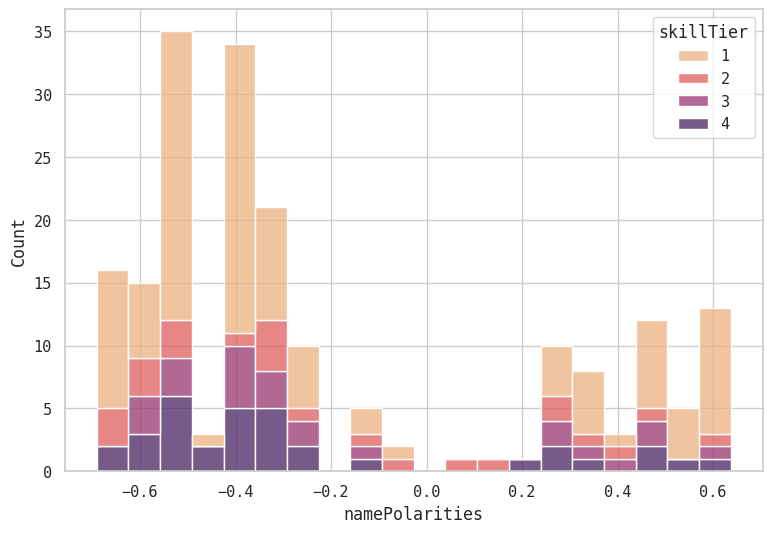

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(9, 6))
sns.histplot(data=df.dropna(),
             x='namePolarities',
             hue='skillTier',
             palette='flare',
             bins=20,
             multiple='stack')

> `namePolarities` isn't useful in distinguishing a player's skill level too. However, notice that comparatively more players
> have names containing words with negative polarities (e.g, kill and die)).